# Data Cleaning or Cleansing

Whenever we have to work with a real world dataset, the first problem that we face is to clean it. The real world dataset never comes clean. It consists lot of discrepancies in the dataset. So, we have to clean the dataset for further processing.

Cleaning data is the process of preparing the dataset for analysis. It is very important because the accuracy of machine learning or data mining models are affected because of poor quality of data.

So, data scientists spend a large amount of their time cleaning the dataset and transform them into a format with which they can work with. In fact, data scientists spend 80% of their time cleaning the data.

A very common scenario is that the dataset contains missing values coded as NaN. Also, the missing values are coded in different ways. The dataset may contain negative or invalid values. It may contain outliers. It may be in the untidy format. All of these are examples of a messy dataset.

In this project, I present several useful ways to handle these discrepancies in the dataset.

## 1) Import the required Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

## 2) Read Data

In [2]:
df = pd.read_csv('../dastasets/friends.csv', sep='|')

In [3]:
df

,fname,lname,age_sex,section,height(cm),weight(kg),age,spend_A,spend_B,spend_C
0,Rahul,Pandey,37_M,B,175.4,85.6,37,1500.0,200.0,300
1,Rakesh,Kumar,38_M,B,NaN,xx,38,NaN,1000.0,NaN
2,Nitesh,Mondol,35_F,B,165.1,?,35,500.0,-100.0,200
3,Arvind,Dwivedi,40_M,A,0,55.6,40,300.0,300.0,NaN
4,Nikhil,Shikharwar,39_M,B,160.8,160,39,200.0,NaN,300
5,Ashutosh,Merothiya,36_M,A,xx,-60,36,100.0,400.0,NaN
6,Shubhro,Das,35_F,C,170.3,75.5,35,NaN,500.0,500
7,Suvendu,Das,34_M,C,155.1,56.8,34,1000.0,100.0,xx
8,Swadesh,Kumar,36_M,C,154.2,60.6,36,100.0,200.0,300
9,Arun,Vishwakarma,38_F,A,162.1,58.7,38,600.0,200.0,200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fname       10 non-null     object 
 1   lname       10 non-null     object 
 2   age_sex     10 non-null     object 
 3   section     10 non-null     object 
 4   height(cm)  9 non-null      object 
 5   weight(kg)  10 non-null     object 
 6   age         10 non-null     int64  
 7   spend_A     8 non-null      float64
 8   spend_B     9 non-null      float64
 9   spend_C     7 non-null      object 
dtypes: float64(2), int64(1), object(7)
memory usage: 928.0+ bytes


In [5]:
df.describe()

,age,spend_A,spend_B
count,10.000000,8.000000,9.000000
mean,36.800000,537.500000,311.111111
std,1.932184,492.624169,310.017921
min,34.000000,100.000000,-100.000000
25%,35.250000,175.000000,200.000000
50%,36.500000,400.000000,200.000000
75%,38.000000,700.000000,400.000000
max,40.000000,1500.000000,1000.000000


In [6]:
sorted(df['weight(kg)'].unique())

['-60', '160', '55.6', '56.8', '58.7', '60.6', '75.5', '85.6', '?', 'xx']

In [7]:
df['weight(kg)'].value_counts()

55.6    1
-60     1
xx      1
85.6    1
?       1
60.6    1
75.5    1
58.7    1
160     1
56.8    1
Name: weight(kg), dtype: int64

**Some feature engineering**

In [8]:
df['sex'] = df['age_sex'].apply(lambda x: x.split('_')[1])
df.head(10)

,fname,lname,age_sex,section,height(cm),weight(kg),age,spend_A,spend_B,spend_C,sex
0,Rahul,Pandey,37_M,B,175.4,85.6,37,1500.0,200.0,300,M
1,Rakesh,Kumar,38_M,B,NaN,xx,38,NaN,1000.0,NaN,M
2,Nitesh,Mondol,35_F,B,165.1,?,35,500.0,-100.0,200,F
3,Arvind,Dwivedi,40_M,A,0,55.6,40,300.0,300.0,NaN,M
4,Nikhil,Shikharwar,39_M,B,160.8,160,39,200.0,NaN,300,M
5,Ashutosh,Merothiya,36_M,A,xx,-60,36,100.0,400.0,NaN,M
6,Shubhro,Das,35_F,C,170.3,75.5,35,NaN,500.0,500,F
7,Suvendu,Das,34_M,C,155.1,56.8,34,1000.0,100.0,xx,M
8,Swadesh,Kumar,36_M,C,154.2,60.6,36,100.0,200.0,300,M
9,Arun,Vishwakarma,38_F,A,162.1,58.7,38,600.0,200.0,200,F


In [9]:
df.drop('age_sex', axis=1, inplace=True)
df.head(10)

,fname,lname,section,height(cm),weight(kg),age,spend_A,spend_B,spend_C,sex
0,Rahul,Pandey,B,175.4,85.6,37,1500.0,200.0,300,M
1,Rakesh,Kumar,B,NaN,xx,38,NaN,1000.0,NaN,M
2,Nitesh,Mondol,B,165.1,?,35,500.0,-100.0,200,F
3,Arvind,Dwivedi,A,0,55.6,40,300.0,300.0,NaN,M
4,Nikhil,Shikharwar,B,160.8,160,39,200.0,NaN,300,M
5,Ashutosh,Merothiya,A,xx,-60,36,100.0,400.0,NaN,M
6,Shubhro,Das,C,170.3,75.5,35,NaN,500.0,500,F
7,Suvendu,Das,C,155.1,56.8,34,1000.0,100.0,xx,M
8,Swadesh,Kumar,C,154.2,60.6,36,100.0,200.0,300,M
9,Arun,Vishwakarma,A,162.1,58.7,38,600.0,200.0,200,F


In [10]:
df = df[['fname', 'lname', 'section', 'height(cm)', 'weight(kg)', 'age', 'sex', 'spend_A', 'spend_B', 'spend_C']]
df.head(10)

,fname,lname,section,height(cm),weight(kg),age,sex,spend_A,spend_B,spend_C
0,Rahul,Pandey,B,175.4,85.6,37,M,1500.0,200.0,300
1,Rakesh,Kumar,B,NaN,xx,38,M,NaN,1000.0,NaN
2,Nitesh,Mondol,B,165.1,?,35,F,500.0,-100.0,200
3,Arvind,Dwivedi,A,0,55.6,40,M,300.0,300.0,NaN
4,Nikhil,Shikharwar,B,160.8,160,39,M,200.0,NaN,300
5,Ashutosh,Merothiya,A,xx,-60,36,M,100.0,400.0,NaN
6,Shubhro,Das,C,170.3,75.5,35,F,NaN,500.0,500
7,Suvendu,Das,C,155.1,56.8,34,M,1000.0,100.0,xx
8,Swadesh,Kumar,C,154.2,60.6,36,M,100.0,200.0,300
9,Arun,Vishwakarma,A,162.1,58.7,38,F,600.0,200.0,200


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fname       10 non-null     object 
 1   lname       10 non-null     object 
 2   section     10 non-null     object 
 3   height(cm)  9 non-null      object 
 4   weight(kg)  10 non-null     object 
 5   age         10 non-null     int64  
 6   sex         10 non-null     object 
 7   spend_A     8 non-null      float64
 8   spend_B     9 non-null      float64
 9   spend_C     7 non-null      object 
dtypes: float64(2), int64(1), object(7)
memory usage: 928.0+ bytes


In [12]:
df.describe()

,age,spend_A,spend_B
count,10.000000,8.000000,9.000000
mean,36.800000,537.500000,311.111111
std,1.932184,492.624169,310.017921
min,34.000000,100.000000,-100.000000
25%,35.250000,175.000000,200.000000
50%,36.500000,400.000000,200.000000
75%,38.000000,700.000000,400.000000
max,40.000000,1500.000000,1000.000000


**Problems**
- Weight, height, spend_C are not shown in describe because they are not numeric

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fname       10 non-null     object 
 1   lname       10 non-null     object 
 2   section     10 non-null     object 
 3   height(cm)  9 non-null      object 
 4   weight(kg)  10 non-null     object 
 5   age         10 non-null     int64  
 6   sex         10 non-null     object 
 7   spend_A     8 non-null      float64
 8   spend_B     9 non-null      float64
 9   spend_C     7 non-null      object 
dtypes: float64(2), int64(1), object(7)
memory usage: 928.0+ bytes


## 3) Start Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fname       10 non-null     object 
 1   lname       10 non-null     object 
 2   section     10 non-null     object 
 3   height(cm)  9 non-null      object 
 4   weight(kg)  10 non-null     object 
 5   age         10 non-null     int64  
 6   sex         10 non-null     object 
 7   spend_A     8 non-null      float64
 8   spend_B     9 non-null      float64
 9   spend_C     7 non-null      object 
dtypes: float64(2), int64(1), object(7)
memory usage: 928.0+ bytes


In [15]:
df.head(10)

,fname,lname,section,height(cm),weight(kg),age,sex,spend_A,spend_B,spend_C
0,Rahul,Pandey,B,175.4,85.6,37,M,1500.0,200.0,300
1,Rakesh,Kumar,B,NaN,xx,38,M,NaN,1000.0,NaN
2,Nitesh,Mondol,B,165.1,?,35,F,500.0,-100.0,200
3,Arvind,Dwivedi,A,0,55.6,40,M,300.0,300.0,NaN
4,Nikhil,Shikharwar,B,160.8,160,39,M,200.0,NaN,300
5,Ashutosh,Merothiya,A,xx,-60,36,M,100.0,400.0,NaN
6,Shubhro,Das,C,170.3,75.5,35,F,NaN,500.0,500
7,Suvendu,Das,C,155.1,56.8,34,M,1000.0,100.0,xx
8,Swadesh,Kumar,C,154.2,60.6,36,M,100.0,200.0,300
9,Arun,Vishwakarma,A,162.1,58.7,38,F,600.0,200.0,200


first start with changing columns data type for the right one and using **errors='coerce'** you will be sure any data that not in format will be NaN

In [16]:
df["age"] = pd.to_numeric(df["age"], errors='coerce')
df["height(cm)"] = pd.to_numeric(df["height(cm)"], errors='coerce')
df["weight(kg)"] = pd.to_numeric(df["weight(kg)"], errors='coerce')
df["spend_A"] = pd.to_numeric(df["spend_A"], errors='coerce')
df["spend_B"] = pd.to_numeric(df["spend_B"], errors='coerce')
df["spend_C"] = pd.to_numeric(df["spend_C"], errors='coerce')

In [17]:
numerical_colms = ['age', 'height(cm)', 'weight(kg)', 'spend_A', 'spend_B', 'spend_C']

for col in numerical_colms:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [18]:
df.head(10)

,fname,lname,section,height(cm),weight(kg),age,sex,spend_A,spend_B,spend_C
0,Rahul,Pandey,B,175.4,85.6,37,M,1500.0,200.0,300.0
1,Rakesh,Kumar,B,NaN,NaN,38,M,NaN,1000.0,NaN
2,Nitesh,Mondol,B,165.1,NaN,35,F,500.0,-100.0,200.0
3,Arvind,Dwivedi,A,0.0,55.6,40,M,300.0,300.0,NaN
4,Nikhil,Shikharwar,B,160.8,160.0,39,M,200.0,NaN,300.0
5,Ashutosh,Merothiya,A,NaN,-60.0,36,M,100.0,400.0,NaN
6,Shubhro,Das,C,170.3,75.5,35,F,NaN,500.0,500.0
7,Suvendu,Das,C,155.1,56.8,34,M,1000.0,100.0,NaN
8,Swadesh,Kumar,C,154.2,60.6,36,M,100.0,200.0,300.0
9,Arun,Vishwakarma,A,162.1,58.7,38,F,600.0,200.0,200.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fname       10 non-null     object 
 1   lname       10 non-null     object 
 2   section     10 non-null     object 
 3   height(cm)  8 non-null      float64
 4   weight(kg)  8 non-null      float64
 5   age         10 non-null     int64  
 6   sex         10 non-null     object 
 7   spend_A     8 non-null      float64
 8   spend_B     9 non-null      float64
 9   spend_C     6 non-null      float64
dtypes: float64(5), int64(1), object(4)
memory usage: 928.0+ bytes


In [20]:
df.describe()

,height(cm),weight(kg),age,spend_A,spend_B,spend_C
count,8.0000,8.000000,10.000000,8.000000,9.000000,6.000000
mean,142.8750,61.600000,36.800000,537.500000,311.111111,300.000000
std,58.1695,60.126985,1.932184,492.624169,310.017921,109.544512
min,0.0000,-60.000000,34.000000,100.000000,-100.000000,200.000000
25%,154.8750,56.500000,35.250000,175.000000,200.000000,225.000000
50%,161.4500,59.650000,36.500000,400.000000,200.000000,300.000000
75%,166.4000,78.025000,38.000000,700.000000,400.000000,300.000000
max,175.4000,160.000000,40.000000,1500.000000,1000.000000,500.000000


**Problems**
- Weight column has -60 kg and that's wrong.
- Height column has min value of 0 and that's wrong also.
- Spend_B columns has min value of -100 that make no sense.

In [21]:
df['weight(kg)'] = df['weight(kg)'].apply(lambda x: abs(x))
df['spend_B'] = df['spend_B'].apply(lambda x: abs(x))

In [22]:
df.describe()

,height(cm),weight(kg),age,spend_A,spend_B,spend_C
count,8.0000,8.000000,10.000000,8.000000,9.000000,6.000000
mean,142.8750,76.600000,36.800000,537.500000,333.333333,300.000000
std,58.1695,35.300304,1.932184,492.624169,282.842712,109.544512
min,0.0000,55.600000,34.000000,100.000000,100.000000,200.000000
25%,154.8750,58.225000,35.250000,175.000000,200.000000,225.000000
50%,161.4500,60.300000,36.500000,400.000000,200.000000,300.000000
75%,166.4000,78.025000,38.000000,700.000000,400.000000,300.000000
max,175.4000,160.000000,40.000000,1500.000000,1000.000000,500.000000


In [23]:
df['height(cm)'].value_counts()

155.1    1
175.4    1
165.1    1
160.8    1
154.2    1
162.1    1
170.3    1
0.0      1
Name: height(cm), dtype: int64

In [24]:
median_of_height = df['height(cm)'].median()
median_of_height

161.45

In [25]:
df.loc[df['height(cm)'] == 0.0, 'height(cm)']

3    0.0
Name: height(cm), dtype: float64

In [26]:
df.loc[df['height(cm)'] == 0.0, 'height(cm)'] = median_of_height
df.head(10)

,fname,lname,section,height(cm),weight(kg),age,sex,spend_A,spend_B,spend_C
0,Rahul,Pandey,B,175.40,85.6,37,M,1500.0,200.0,300.0
1,Rakesh,Kumar,B,NaN,NaN,38,M,NaN,1000.0,NaN
2,Nitesh,Mondol,B,165.10,NaN,35,F,500.0,100.0,200.0
3,Arvind,Dwivedi,A,161.45,55.6,40,M,300.0,300.0,NaN
4,Nikhil,Shikharwar,B,160.80,160.0,39,M,200.0,NaN,300.0
5,Ashutosh,Merothiya,A,NaN,60.0,36,M,100.0,400.0,NaN
6,Shubhro,Das,C,170.30,75.5,35,F,NaN,500.0,500.0
7,Suvendu,Das,C,155.10,56.8,34,M,1000.0,100.0,NaN
8,Swadesh,Kumar,C,154.20,60.6,36,M,100.0,200.0,300.0
9,Arun,Vishwakarma,A,162.10,58.7,38,F,600.0,200.0,200.0


In [27]:
# Method using apply
def non_zero_height(x):
    if x == 0.0:
        return median_of_height
    else:
        return x

df['height(cm)'] = df['height(cm)'].apply(non_zero_height)
df['height(cm)'] = df['height(cm)'].apply(lambda x: median_of_height if x == 0.0 else x)

In [28]:
df['height(cm)'].value_counts()

155.10    1
175.40    1
165.10    1
154.20    1
160.80    1
161.45    1
162.10    1
170.30    1
Name: height(cm), dtype: int64

In [29]:
df.describe()

,height(cm),weight(kg),age,spend_A,spend_B,spend_C
count,8.000000,8.000000,10.000000,8.000000,9.000000,6.000000
mean,163.056250,76.600000,36.800000,537.500000,333.333333,300.000000
std,7.164767,35.300304,1.932184,492.624169,282.842712,109.544512
min,154.200000,55.600000,34.000000,100.000000,100.000000,200.000000
25%,159.375000,58.225000,35.250000,175.000000,200.000000,225.000000
50%,161.775000,60.300000,36.500000,400.000000,200.000000,300.000000
75%,166.400000,78.025000,38.000000,700.000000,400.000000,300.000000
max,175.400000,160.000000,40.000000,1500.000000,1000.000000,500.000000


## Some Visualizations

In [30]:
df.head(10)

,fname,lname,section,height(cm),weight(kg),age,sex,spend_A,spend_B,spend_C
0,Rahul,Pandey,B,175.40,85.6,37,M,1500.0,200.0,300.0
1,Rakesh,Kumar,B,NaN,NaN,38,M,NaN,1000.0,NaN
2,Nitesh,Mondol,B,165.10,NaN,35,F,500.0,100.0,200.0
3,Arvind,Dwivedi,A,161.45,55.6,40,M,300.0,300.0,NaN
4,Nikhil,Shikharwar,B,160.80,160.0,39,M,200.0,NaN,300.0
5,Ashutosh,Merothiya,A,NaN,60.0,36,M,100.0,400.0,NaN
6,Shubhro,Das,C,170.30,75.5,35,F,NaN,500.0,500.0
7,Suvendu,Das,C,155.10,56.8,34,M,1000.0,100.0,NaN
8,Swadesh,Kumar,C,154.20,60.6,36,M,100.0,200.0,300.0
9,Arun,Vishwakarma,A,162.10,58.7,38,F,600.0,200.0,200.0


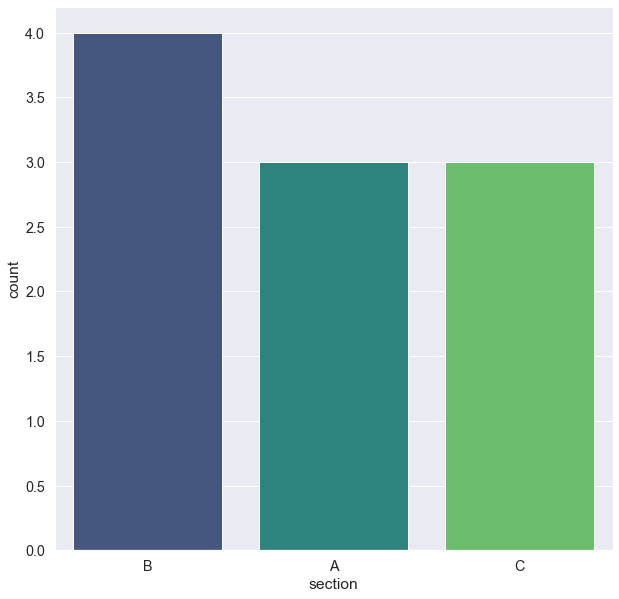

In [31]:
sns.countplot(x='section', data=df, palette='viridis')

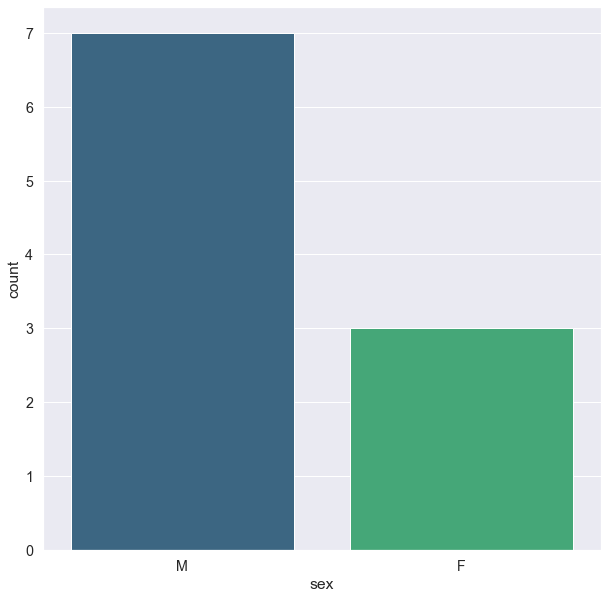

In [32]:
sns.countplot(x='sex', data=df, palette='viridis')

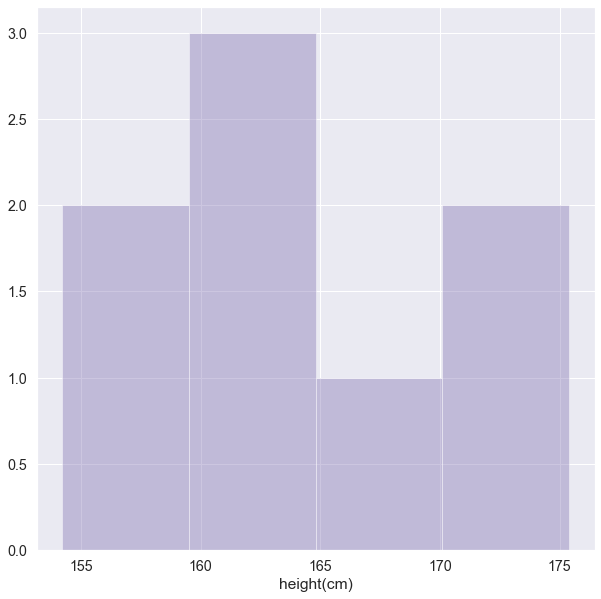

In [33]:
sns.distplot(df['height(cm)'], kde=False, color='m')

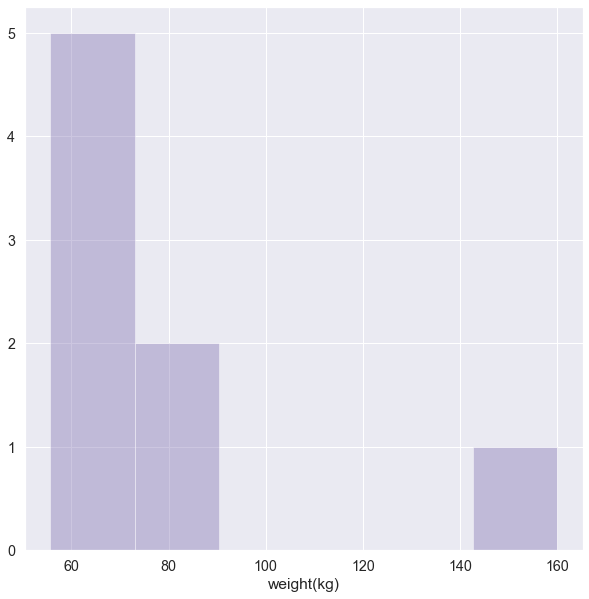

In [34]:
sns.distplot(df['weight(kg)'], kde=False, color='m')

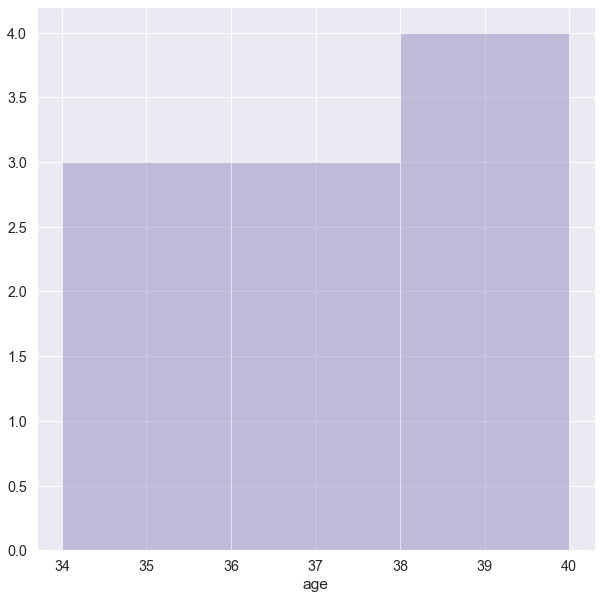

In [35]:
sns.distplot(df['age'], kde=False, color='m')

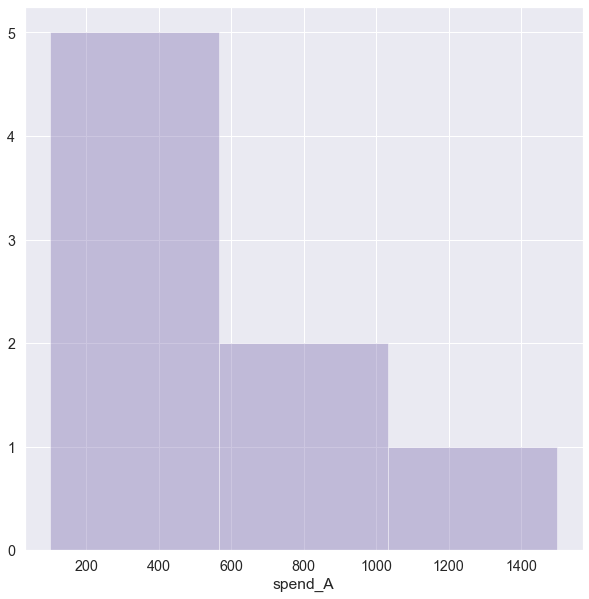

In [36]:
sns.distplot(df['spend_A'], kde=False, color='m')

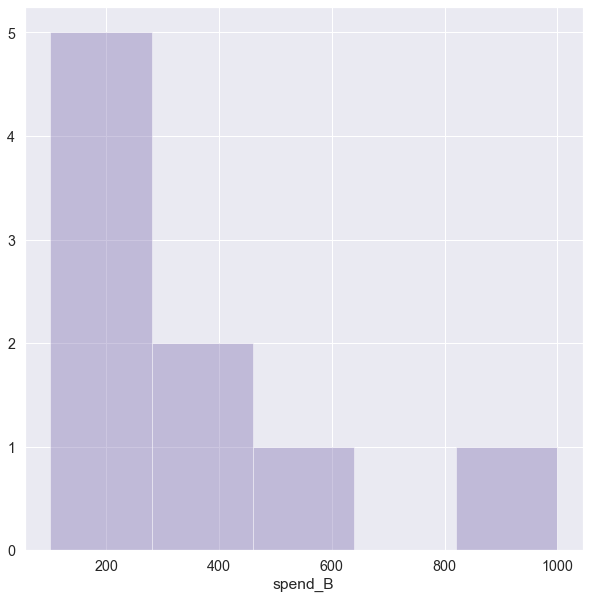

In [37]:
sns.distplot(df['spend_B'], kde=False, color='m')

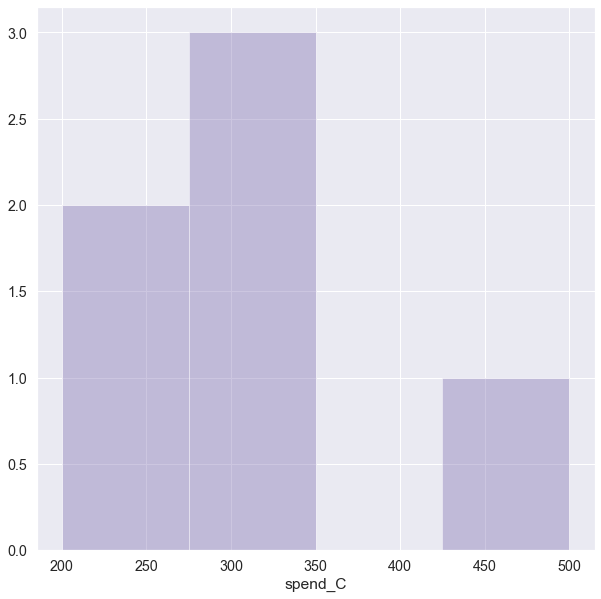

In [38]:
sns.distplot(df['spend_C'], kde=False, color='m')

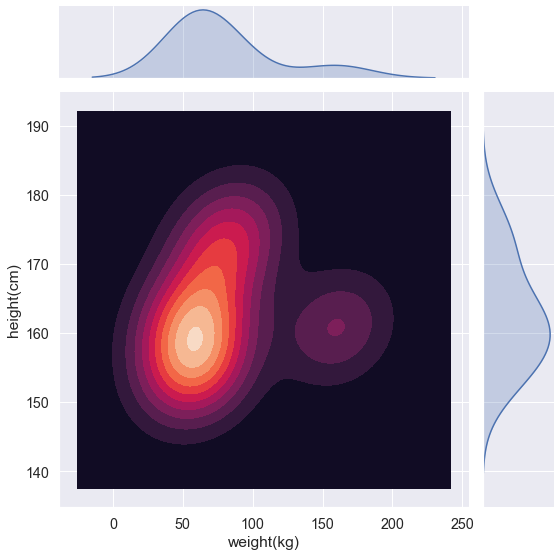

In [39]:
sns.jointplot(x='weight(kg)', y='height(cm)', data=df, height=8, kind='kde', cmap='rocket')

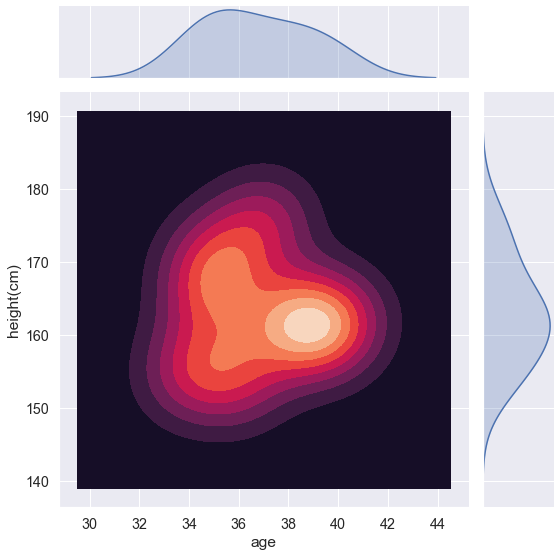

In [40]:
sns.jointplot(x='age', y='height(cm)', data=df, height=8, kind='kde', cmap='rocket')

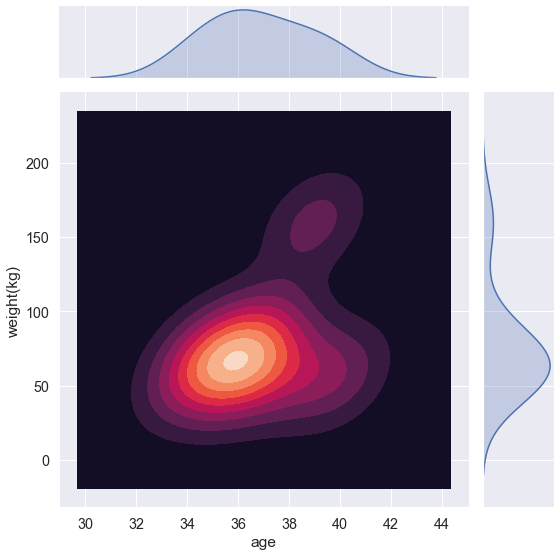

In [41]:
sns.jointplot(x='age', y='weight(kg)', data=df, height=8, kind='kde', cmap='rocket')

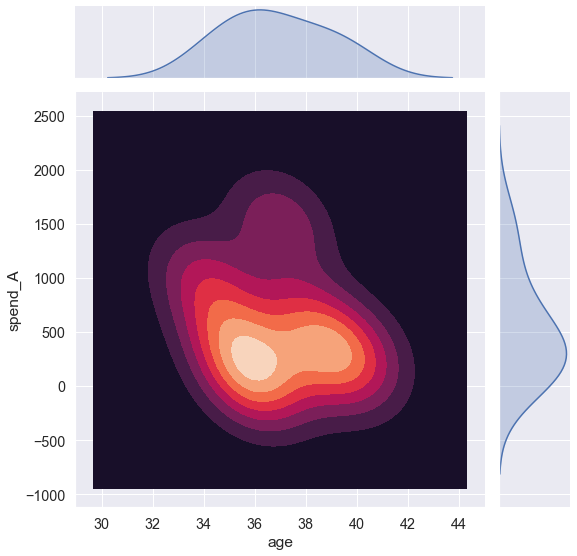

In [42]:
sns.jointplot(x='age', y='spend_A', data=df, height=8, kind='kde', cmap='rocket')

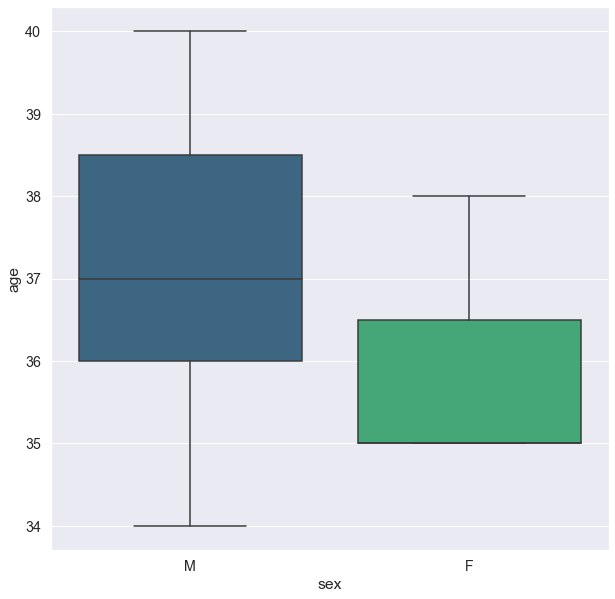

In [43]:
sns.boxplot(x='sex', y='age', data=df, palette='viridis')
# sns.violinplot(x='sex', y='age', data=df, palette='viridis')
# sns.stripplot(x='sex', y='age', data=df, palette='viridis')
# sns.swarmplot(x='sex', y='age', data=df, palette='viridis')

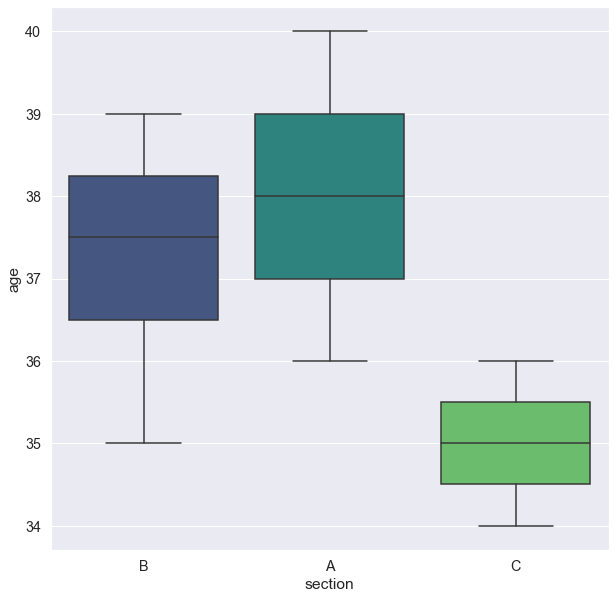

In [44]:
sns.boxplot(x='section', y='age', data=df, palette='viridis')
# sns.violinplot(x='section', y='age', data=df, palette='viridis')
# sns.stripplot(x='section', y='age', data=df, palette='viridis')
# sns.swarmplot(x='section', y='age', data=df, palette='viridis')

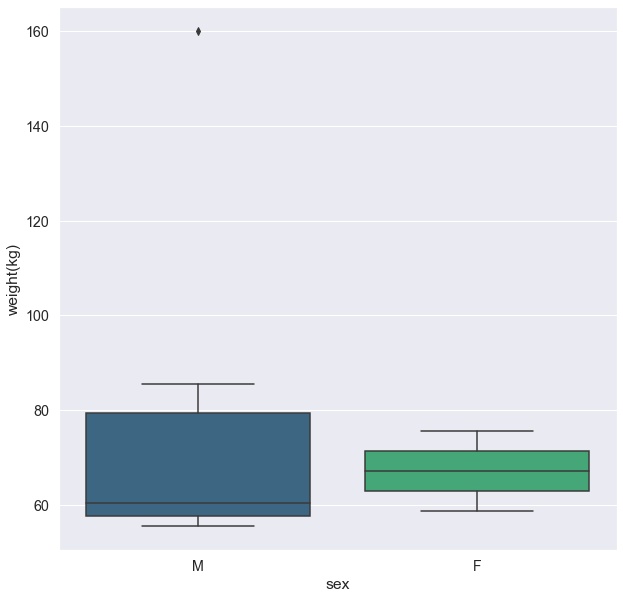

In [45]:
sns.boxplot(x='sex', y='weight(kg)', data=df, palette='viridis')

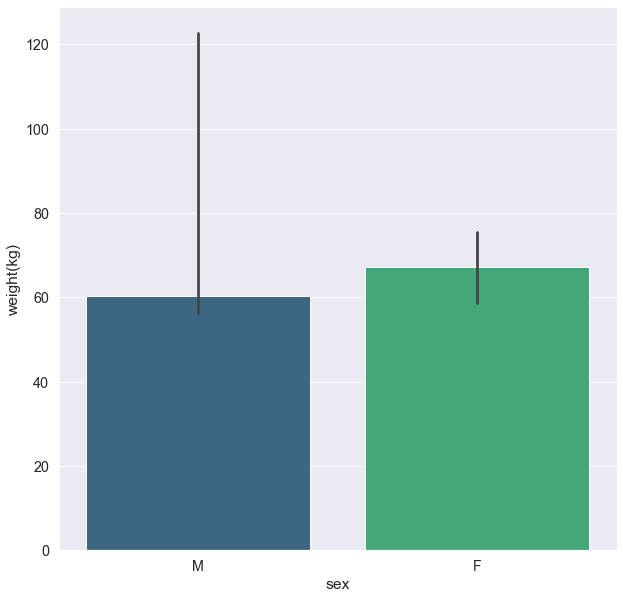

In [46]:
# sns.barplot(x='sex', y='weight(kg)', data=df, palette='viridis')
# sns.barplot(x='sex', y='weight(kg)', data=df, estimator=np.max, palette='viridis')
# sns.barplot(x='sex', y='weight(kg)', data=df, estimator=np.min, palette='viridis')
# sns.barplot(x='sex', y='weight(kg)', data=df, estimator=np.std, palette='viridis')
sns.barplot(x='sex', y='weight(kg)', data=df, estimator=np.median, palette='viridis')

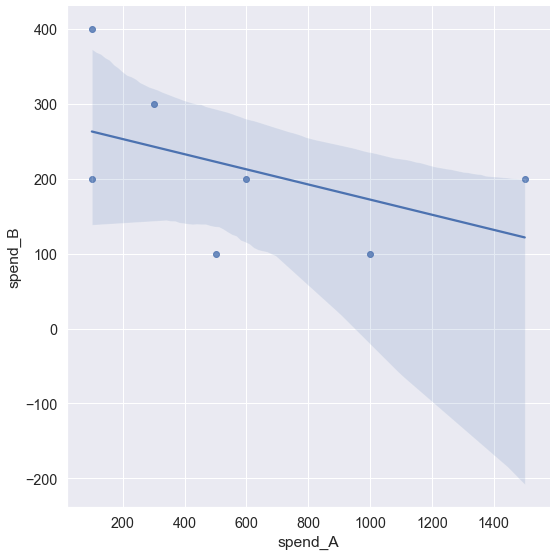

In [47]:
sns.lmplot(x='spend_A', y='spend_B', data=df, height=8)

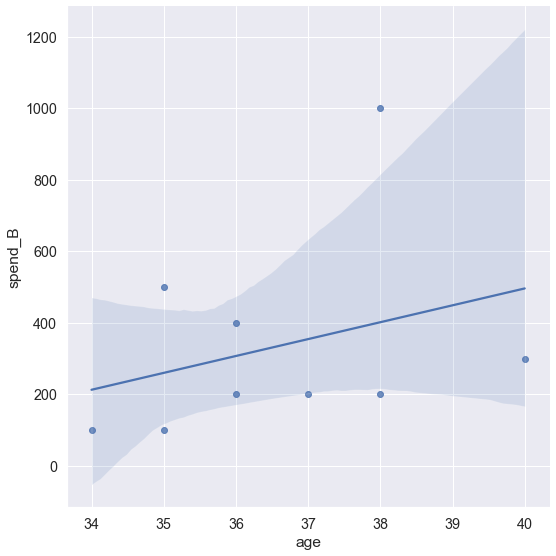

In [48]:
sns.lmplot(x='age', y='spend_B', data=df, height=8)

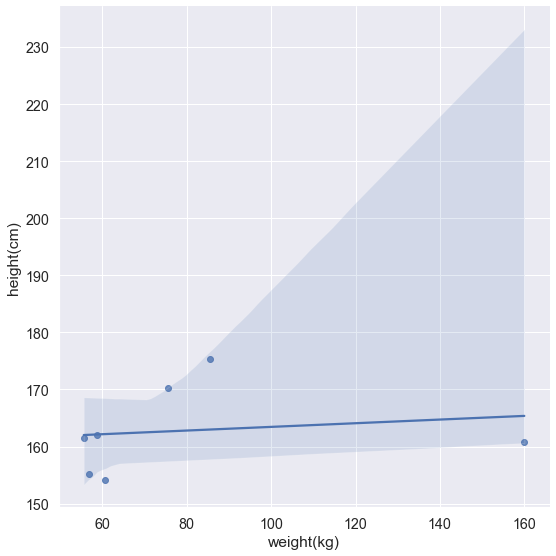

In [49]:
sns.lmplot(x='weight(kg)', y='height(cm)', data=df, height=8)

# Great Work!